In [1]:
# Parameters
method_name = "GroHess"
result_number = -1
visualization_settings = {"savefig": True, "visualize_accs_matrix": True, "visualize_avg_acc_curve": True, "visualize_best_params": True, "visualize_val_accs_matrix": True, "visualize_accuracy_through_benchmarks": True}


In [2]:
# Comment the following cell if running through the command :
# papermill runnable_visualization.ipynb executed_visualization.ipynb -f params_for_visualization.yaml --kernel jupyter.jax_env

method_name = "GroHess"
result_number = -1

# Parameters specific to the visualization
visualization_settings = {"savefig" : True,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True}

In [3]:
from HPO_lib.visualize import visualize_HPO, visualize_validation
from HPO_lib.save_and_load_results import load, get_folder

with open("Results/EWC_1/params_for_HPO.yaml", 'r') as file:
    params_for_HPO = file.read()

params_for_HPO

import re
import ast

def extract_benchmark_settings(input_string):
    # Regular expression to find the benchmark_settings dictionary
    pattern_benchmark_settings = r'benchmark_settings\s*:\s*(\{.*?\})\n'
    pattern_method_settings = r'method_settings\s*:\s*(\{.*?\})\n'
    pattern_HPO_settings = r'HPO_settings\s*:\s*\{[^}]*"HPO_name"\s*:\s*"([^"]+)"'
    pattern_save_results = r'save_results\s*:\s*(True|False)'
    
    # Search the input string for the pattern
    match_1 = re.search(pattern_benchmark_settings, input_string, re.DOTALL)
    match_2 = re.search(pattern_method_settings, input_string, re.DOTALL)
    match_3 = re.search(pattern_HPO_settings, input_string, re.DOTALL)
    match_4 = re.search(pattern_save_results, input_string)

    if match_1 and match_2 and match_3 and match_4:
        benchmark_settings = ast.literal_eval(match_1.group(1))
        method_settings = ast.literal_eval(match_2.group(1))
        HPO_settings = match_3.group(1)
        save_results = bool(match_4.group(1))
        
        return benchmark_settings, method_settings, HPO_settings, save_results
    else:
        ValueError("Could not retrieve parameters")
        return "ah"

extract_benchmark_settings(params_for_HPO)

In [4]:
folder = get_folder (method_name, result_number)

In [5]:
test_accs_matrix, best_params_list, val_accs_matrix, HPO_settings, method_settings, benchmark_settings = load(method_name, result_number)

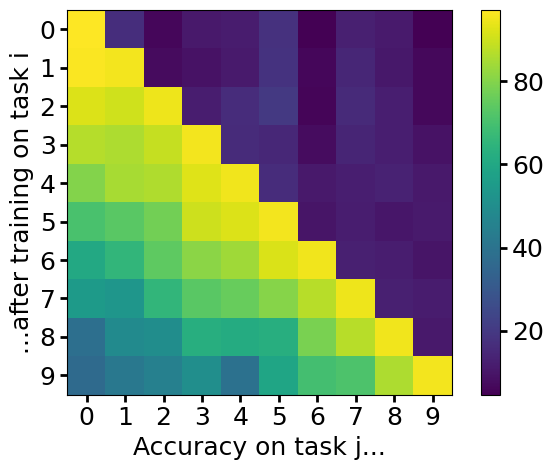

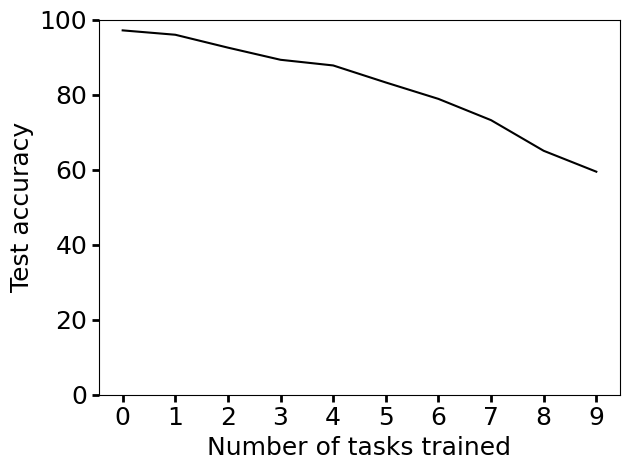

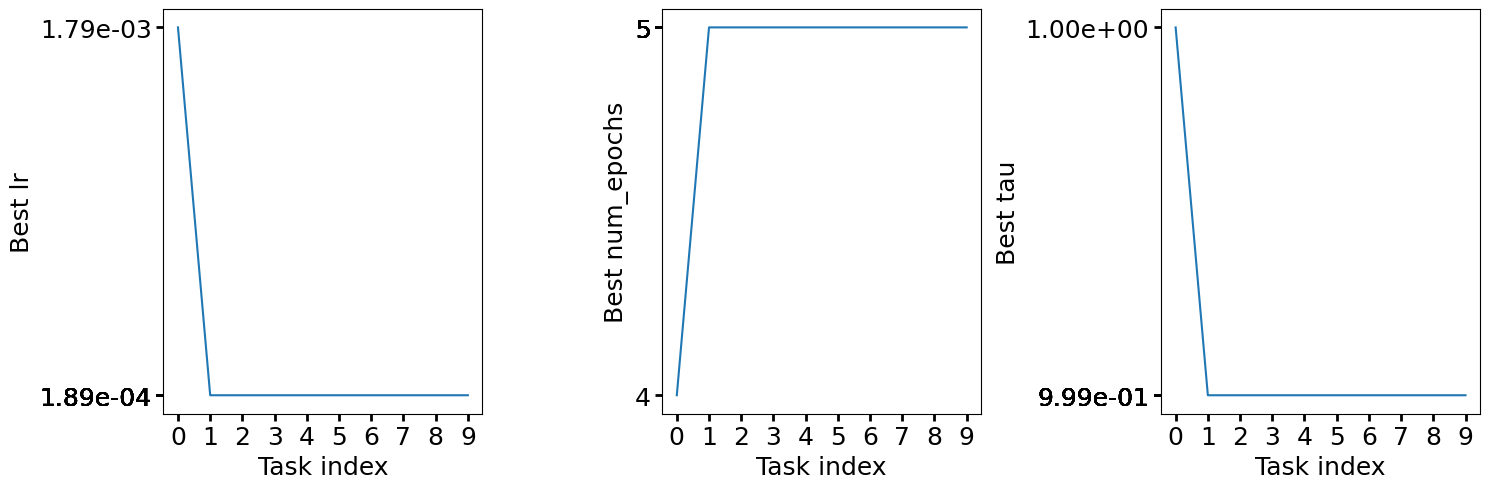

In [6]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings, folder)

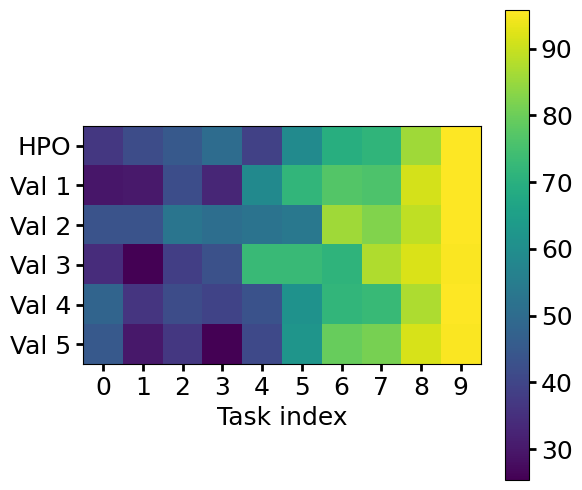

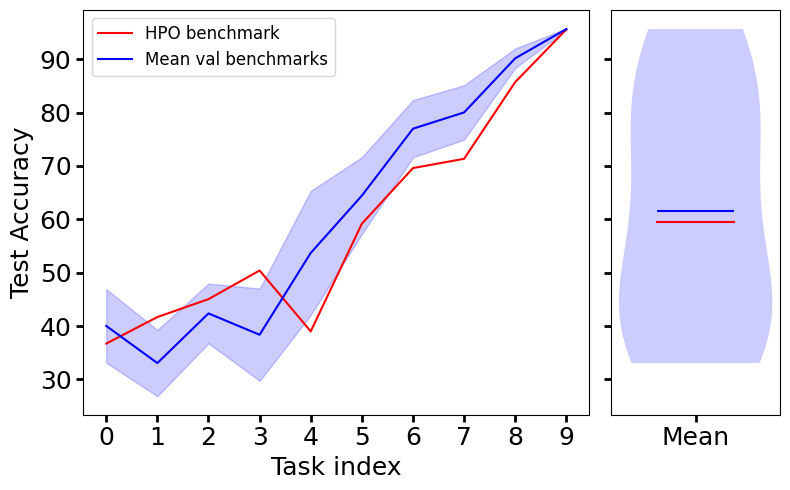

In [7]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings, folder)